### Building CNN Architectures with Keras and Tensorflow

### Building a CNN Architecture in Keras

#### Steps to Build a CNN

1. **Convolutional Layers**  
    - Extract features from the input image using filters/kernels.
    - Learn spatial hierarchies of features automatically.

2. **Activation Functions**  
    - Commonly use ReLU (Rectified Linear Unit) to introduce non-linearity.

3. **Pooling Layers**  
    - Downsample feature maps to reduce dimensions and computation.
    - Common types: MaxPooling, AveragePooling.
    - Helps retain key features while reducing overfitting.

4. **Flattening**  
    - Convert the pooled feature maps into a single vector to feed into fully connected layers.

5. **Dense (Fully Connected) Layers**  
    - Combine features for final predictions.
    - Typically end with a softmax (for multi-class) or sigmoid (for binary) activation.

6. **Output Layer**  
    - Produces the final prediction (class probabilities or regression output).

> **Basic CNN Architecture:**  
> Input Layer → Convolutional Layer → Activation → Pooling Layer → (Repeat Conv + Pool as needed) → Flatten → Fully Connected Layer(s) → Output Layer

---

#### Compiling, Training, and Evaluating a CNN

- **Compile the Model**
  - Define loss function, optimizer, and evaluation metrics.
  - Example loss functions:  
     - `categorical_crossentropy` (multi-class classification)  
     - `binary_crossentropy` (binary classification)
  - Example optimizers:  
     - `Adam` (adaptive learning rate, efficient for large networks)  
     - `SGD` (stochastic gradient descent)
  - Example metrics:  
     - `accuracy`, `precision`, `recall`

- **Train the Model**
  - Use `model.fit()` with training data, validation data, epochs, and batch size.
  - Monitor training and validation metrics to avoid overfitting.

- **Evaluate the Model**
  - Use `model.evaluate()` with test data to calculate final metrics.

---

#### Introduction to Popular CNN Architectures

- **LeNet-5**  
  - One of the earliest CNNs, designed for handwritten digit classification (e.g., MNIST).
  - Consists of two convolutional and pooling layers, followed by fully connected layers.

- **AlexNet**  
  - Revolutionized deep learning for image classification in 2012 (not 2022).
  - Introduced ReLU activation, dropout for regularization, and used GPUs for training.
  - Won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012.

- **VGGNet**  
  - Uses deep networks with small filters (e.g., 3x3).
  - Known for its simplicity and effectiveness.
  - VGG16 and VGG19 are popular variants with 16 and 19 layers, respectively.

---

> **Tip:**  
> For deeper networks, repeat convolution and pooling layers multiple times before flattening and adding dense layers.


In [8]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import tensorflow as tf


load cifar 10 dataset

In [9]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalise the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Training Data Shape: {X_train.shape}, Label Shapes: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Label Shapes: {y_test.shape}")


Training Data Shape: (50000, 32, 32, 3), Label Shapes: (50000, 10)
Testing Data Shape: (10000, 32, 32, 3), Label Shapes: (10000, 10)


Build the CNN model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape = (32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

c:\Users\Cyrus\Documents\AI Mastery\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │       230,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,902 (980.09 KB)

 Trainable params: 250,902 (980.09 KB)

 Non-trainable params: 0 (0.00 B)

compile model

In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# evaluate on the test dataset
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2859 - loss: 1.9062 - val_accuracy: 0.5141 - val_loss: 1.3898
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4805 - loss: 1.4342 - val_accuracy: 0.5506 - val_loss: 1.2517
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5352 - loss: 1.2978 - val_accuracy: 0.6075 - val_loss: 1.1149
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5773 - loss: 1.1997 - val_accuracy: 0.6239 - val_loss: 1.0603
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5971 - loss: 1.1338 - val_accuracy: 0.6506 - val_loss: 1.0137
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6260 - loss: 1.0794 - val_accuracy: 0.6528 - val_loss: 0.9897
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6379 - loss: 1.0302 - val_accuracy: 0.6618 - val_loss: 0.9625
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6480 - loss: 0.9939 - val_accuracy: 0.

visualise training process

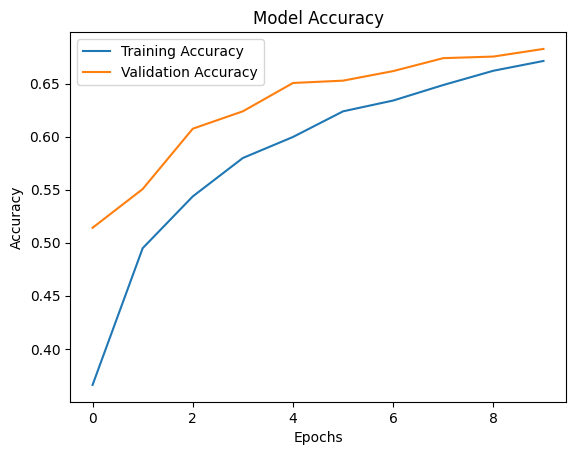

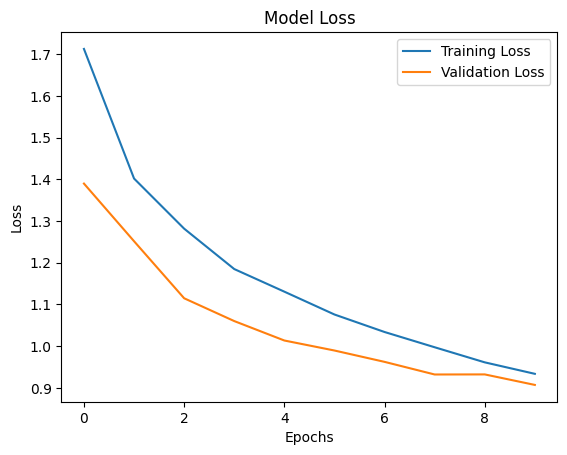

In [13]:
import matplotlib.pyplot as plt

#plot accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#plot loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()